In [2]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

triangulate_act = pd.read_csv('triangulate_Act.csv',sep=';',decimal='.')
triangulate_allROIs = pd.read_csv('triangulate_AllROIs.csv',sep=';',decimal='.')
triangulate_deact = pd.read_csv('triangulate_Deact.csv',sep=';',decimal='.')

In [3]:
triangulateAccuracy = pd.concat([triangulate_act,triangulate_allROIs,triangulate_deact],sort=False,axis=1)

#sorting the columns by name; colum names must start with a number and be followed by _ (that's the [0])
triangulateAccuracy = triangulateAccuracy.reindex(sorted(triangulateAccuracy.columns, key=lambda x: int(x.split('_')[0])), axis='columns')
triangulateAccuracy = triangulateAccuracy.T

In [4]:
numAggregationVariants = 10
file = open('listOfAccuracies.txt').readlines()
accuracies = [l.strip('\n\r') for l in file]

i = 0
group1act = []
group1allROIs = []
group1deact = []

group12act = []
group12allROIs = []
group12deact = []

groupNoneact = []
groupNoneallROIs = []
groupNonedeact = []

coarseAcc = []
fineAcc = []
noneAcc = []
while i < len(accuracies):
    if 'Coarse' in accuracies[i]:
        if 'Act' in accuracies[i]:
            group1act = [float(accuracies[i+1])]*numAggregationVariants
        elif 'AllROIs' in accuracies[i]:
            group1allROIs = [float(accuracies[i+1])]*numAggregationVariants
        elif 'Deact' in accuracies[i]:
            group1deact = [float(accuracies[i+1])]*numAggregationVariants
    if 'Fine' in accuracies[i]:
        if 'Act' in accuracies[i]:
            group12act = [float(accuracies[i+1])]*numAggregationVariants
        elif 'AllROIs' in accuracies[i]:
            group12allROIs = [float(accuracies[i+1])]*numAggregationVariants
        elif 'Deact' in accuracies[i]:
            group12deact = [float(accuracies[i+1])]*numAggregationVariants
    if 'NoAgg' in accuracies[i]:
        if 'Act' in accuracies[i]:
            groupNoneact = [float(accuracies[i+1])]*numAggregationVariants
        elif 'AllROIs' in accuracies[i]:
            groupNoneallROIs = [float(accuracies[i+1])]*numAggregationVariants
        elif 'Deact' in accuracies[i]:
            groupNonedeact = [float(accuracies[i+1])]*numAggregationVariants
    i = i + 1

# coarseAcc
coarseAcc = pd.DataFrame([group1act,group1allROIs,group1deact])

coarseAcc = coarseAcc.T
coarseAcc.columns = ['coarse_group_act','coarse_group_allROIs','coarse_group_deact']
coarseAcc = coarseAcc.T

# fineAcc
fineAcc = pd.DataFrame([group12act,group12allROIs,group12deact])

fineAcc = fineAcc.T
fineAcc.columns = ['27_group_act','27_group_allROIs','27_group_deact']
fineAcc = fineAcc.T

# NoneAcc
noneAcc = pd.DataFrame([groupNoneact,groupNoneallROIs,groupNonedeact])

noneAcc = noneAcc.T
noneAcc.columns = ['No_group_act','No_group_allROIs','No_group_deact']
noneAcc = noneAcc.T

plotAllAccuracies = pd.concat([coarseAcc,triangulateAccuracy,fineAcc,noneAcc],sort=False,axis=0)
       
plotAllAccuracies

,0,1,2,3,4,5,6,7,8,9
coarse_group_act,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
coarse_group_allROIs,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
coarse_group_deact,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2_groups_act,83.333333,100.000000,83.333333,83.333333,100.000000,100.000000,100.000000,100.000000,100.000000,91.666667
2_groups_allROIs,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2_groups_Deact,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
3_groups_act,100.000000,100.000000,100.000000,100.000000,77.777778,100.000000,100.000000,100.000000,100.000000,72.222222
3_groups_allROIs,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
3_groups_Deact,100.000000,83.333333,100.000000,94.444444,100.000000,100.000000,100.000000,94.444444,94.444444,100.000000
9_groups_act,98.148148,100.000000,94.444444,94.444444,92.592593,100.000000,94.444444,96.296296,94.444444,92.592593


In [5]:
means = plotAllAccuracies.mean(axis = 1)
means_act = [None]
means_deact = [None]
means_all = [None]

for i,x in zip(range(len(means)),means):
    if i%3 == 0:
        means_act.append(x)
        means_act.append(None)
        means_act.append(None)        
    if i%3 == 1:
        means_deact.append(None)        
        means_deact.append(x)
        means_deact.append(None)
    if i%3 == 2:
        means_all.append(None)
        means_all.append(None)                
        means_all.append(x)
        
        
means_act


[None,
 100.0,
 None,
 None,
 94.16666666666666,
 None,
 None,
 95.0,
 None,
 None,
 95.74074074074075,
 None,
 None,
 93.07692307692305,
 None,
 None,
 86.78160919540231,
 None,
 None,
 84.24242424242424,
 None,
 None]

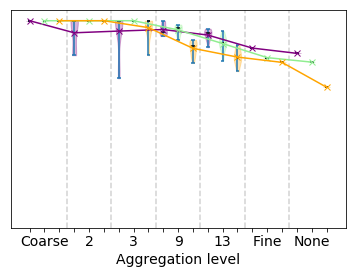

In [13]:
# violin_parts = plt.violinplot(triangulateAccuracy,showmedians=True,showmeans=True)
y_low = 0
y_high = 105

numAggregationLevels = 7
plt.rcParams.update({'font.size': 14})
colors = ['purple', 'lightgreen','orange']*numAggregationLevels


fig,ax = plt.subplots()
violin_parts = plt.violinplot(plotAllAccuracies,showmedians=True)
# xy = [[l.vertices[:,0].mean(),l.vertices[0,1]] for l in violin_parts['cmeans'].get_paths()]
# xy = np.array(xy)
# ax.scatter(xy[:,0], xy[:,1],s=121, c="green", marker="x", zorder=1)
for patch, color in zip(violin_parts['bodies'], colors):
        patch.set_color(color)
x_label = plt.xlabel('Aggregation level')
# y_label = plt.ylabel('Accuracy (%)')

my_xticks = ['','Coarse','','','2','','','3','','','9','','','13','','','Fine','','','None','']

x = [x for x in range(1,22)]
plt.xticks(x, my_xticks)

plt.axvline(x=3.5,color='lightgray',linestyle = 'dashed')
plt.axvline(x=6.5,color='lightgray',linestyle = 'dashed')
plt.axvline(x=9.5,color='lightgray',linestyle = 'dashed')
plt.axvline(x=12.5,color='lightgray',linestyle = 'dashed')
plt.axvline(x=15.5,color='lightgray',linestyle = 'dashed')
plt.axvline(x=18.5,color='lightgray',linestyle = 'dashed')

#turning of labels and ticks and y axis
plt.gca().yaxis.set_major_locator(plt.NullLocator())


# make lines invisible
violin_parts['cmedians'].set_color('black')

# this is for connecting the means in the violin plots. since only every three means
# must be connected, we need a mask
xs = np.arange(22)
means_act = np.array(means_act).astype(np.double)
means_act_mask = np.isfinite(means_act)

means_deact = np.array(means_deact).astype(np.double)
means_deact_mask = np.isfinite(means_deact)

means_all = np.array(means_all).astype(np.double)
means_all_mask = np.isfinite(means_all)


plt.plot(xs[means_act_mask], means_act[means_act_mask], linestyle='-', marker='x', color = 'purple')
plt.plot(xs[means_deact_mask], means_deact[means_deact_mask], linestyle='-', marker='x', color = 'lightgreen')
plt.plot(xs[means_all_mask], means_all[means_all_mask], linestyle='-', marker='x', color = 'orange')
plt.ylim((y_low,y_high))

plt.savefig('triangulateAccuracy_FSE.png',dpi=300, transparent=False, bbox_inches='tight', pad_inches=0)
plt.show()